In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──

✔ dplyr     1.1.4     ✔ readr     2.1.4

✔ forcats   1.0.0     ✔ stringr   1.5.1

✔ ggplot2   3.4.4     ✔ tibble    3.2.1

✔ lubridate 1.9.3     ✔ tidyr     1.3.0

✔ purrr     1.0.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──

✖ dplyr::filter() masks stats::filter()

✖ dplyr::lag()    masks stats::lag()

ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "usa-real-estate-dataset"

In [59]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [62]:
#Libraries
library(dplyr)
library(data.table)
library(ggplot2)

In [49]:
# Paste the copied path here
dataset_path <- "/kaggle/input/usa-real-estate-dataset/realtor-data.zip.csv"

# Read the dataset into a data frame
df <- read.csv(dataset_path)

In [50]:
#the headset
head(df)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,for_sale,3,2,0.12,Adjuntas,Puerto Rico,601,920,,105000
2,for_sale,4,2,0.08,Adjuntas,Puerto Rico,601,1527,,80000
3,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,795,748,,67000
4,for_sale,4,2,0.10,Ponce,Puerto Rico,731,1800,,145000
5,for_sale,6,2,0.05,Mayaguez,Puerto Rico,680,NA,,65000
6,for_sale,4,3,0.46,San Sebastian,Puerto Rico,612,2520,,179000


In [51]:
#check summary
summary(df)

    status               bed              bath           acre_lot       
 Length:1401066     Min.   :  1.00   Min.   :  1.00   Min.   :     0.0  
 Class :character   1st Qu.:  2.00   1st Qu.:  2.00   1st Qu.:     0.1  
 Mode  :character   Median :  3.00   Median :  2.00   Median :     0.3  
                    Mean   :  3.39   Mean   :  2.49   Mean   :    32.2  
                    3rd Qu.:  4.00   3rd Qu.:  3.00   3rd Qu.:     1.3  
                    Max.   :123.00   Max.   :198.00   Max.   :100000.0  
                    NA's   :216528   NA's   :194213   NA's   :357467    
     city              state              zip_code       house_size     
 Length:1401066     Length:1401066     Min.   :  601   Min.   :      4  
 Class :character   Class :character   1st Qu.: 5652   1st Qu.:   1170  
 Mode  :character   Mode  :character   Median : 8757   Median :   1700  
                                       Mean   : 8357   Mean   :   2179  
                                       3rd Qu.:1142

In [54]:
#check columns name
colnames(df)

[1] "status"         "bed"            "bath"           "acre_lot"      
 [5] "city"           "state"          "zip_code"       "house_size"    
 [9] "prev_sold_date" "price"

In [53]:
#check for duplicates 
duplicates <- df%>%duplicated()
dupli_df <- duplicates%>%table()
print(dupli_df)

.
  FALSE    TRUE 
 152040 1249026 


In [55]:
#Check for null values
df%>%summarise_all(~sum(is.na(.)))

status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,216528,194213,357467,0,0,479,450112,0,108


In [56]:
#delete rows where the house price is null
df <- df%>%filter(!is.na(df$price) & !is.na(zip_code))

In [57]:
#Check for null values
df%>%summarise_all(~sum(is.na(.)))

status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,216179,193825,357321,0,0,0,449785,0,0


In [58]:
df <- df %>% mutate_at(vars(bed, bath, acre_lot), ~ifelse(is.na(.), 0, .))
df%>%summarise_all(~sum(is.na(.)))

status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,449785,0,0


In [66]:
#Histogram of Bed count distribution
hist_bed <- ggplot(df, aes(x = bed)) +
  geom_histogram(fill = "green4", color = "white", bins = 30) +
  labs(title = "Histogram of Bed Counts",
       x = "Number of Beds",
       y = "Count") +
  theme_minimal() +

print(hist_bed)

 [1] "hrbrthemes" "data.table" "lubridate"  "forcats"    "stringr"   
 [6] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[11] "ggplot2"    "tidyverse"  "stats"      "graphics"   "grDevices" 
[16] "utils"      "datasets"   "bigrquery"  "httr"       "methods"   
[21] "base"      


ERROR: [1m[33mError[39m in `ggplot_add()`:[22m
[1m[22m[33m![39m Can't add `print(hist_bed)` to a [34m<ggplot>[39m object.


ERROR: [1m[33mError[39m in `ggplot_add()`:[22m
[1m[22m[33m![39m Can't add `print(hist_bath)` to a [34m<ggplot>[39m object.


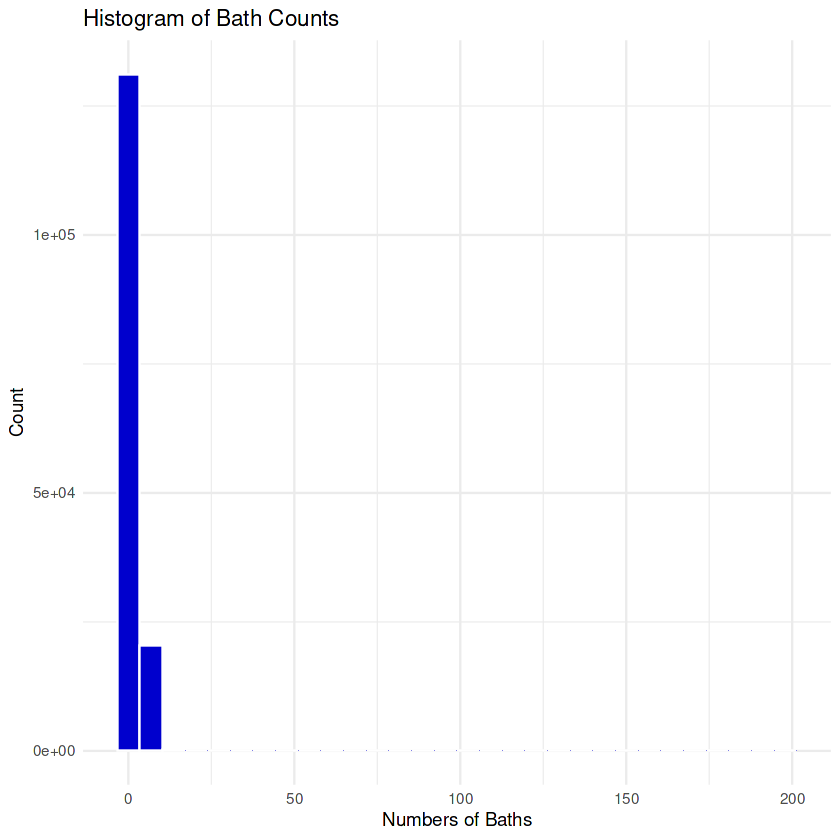

In [65]:
#Histogram of Bath count distribution
hist_bath <- ggplot(df, aes(x = bath)) +
  geom_histogram(fill = "blue3", color = "white", bins = 30) +
  labs(title = "Histogram of Bath Counts",
       x = "Number of Bath",
       y = "Count") +
  theme_minimal() +

print(hist_bath)

In [ ]:
# scatterplot Price vs acre lot

In [ ]:
# scatterplot Price vs bed

In [ ]:
# scatterplot Price vs bath

In [ ]:
# scatterplot Price vs house sized

In [ ]:
# Map of City

In [ ]:
#Map of statte

In [ ]:
#Map of Zip_code